In [ ]:
import os
import cv2
from PIL import Image
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pingouin as pg
import scipy
from collections import Counter

In [2]:
rcParams['font.family']='Times New Roman'

D:\ProgramData\Anaconda3\envs\torch\lib\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [88]:
### Thanks to github.com/zhaoxuhui

def calcEntropy(img):
    entropy = []

    hist = cv2.calcHist([img], [0], None, [256], [0, 255])
    total_pixel = img.shape[0] * img.shape[1]

    for item in hist:
        probability = item / total_pixel
        if probability == 0:
            en = 0
        else:
            en = -1 * probability * np.log(probability)[0]
        entropy.append(en)

    sum_en = np.sum(entropy)[0]
    return sum_en

@jit(nopython=True)
def calcIJ(img_patch):
    total_p = img_patch.shape[0] * img_patch.shape[1]
    if total_p % 2 != 0:
        center_p = img_patch[int(img_patch.shape[0] / 2), int(img_patch.shape[1] / 2)]
        mean_p = (np.sum(img_patch) - center_p) / (total_p - 1)
        return (center_p, mean_p)
    else:
        pass


def calcEntropy2dSpeedUp(img, win_w=3, win_h=3):
    height = img.shape[0]

    ext_x = int(win_w / 2)
    ext_y = int(win_h / 2)

    ext_h_part = np.zeros([height, ext_x], img.dtype)
    tem_img = np.hstack((ext_h_part, img, ext_h_part))
    ext_v_part = np.zeros([ext_y, tem_img.shape[1]], img.dtype)
    final_img = np.vstack((ext_v_part, tem_img, ext_v_part))

    new_width = final_img.shape[1]
    new_height = final_img.shape[0]

    # the most time-consuming step, traversing and computing the pairs
    IJ = []
    for i in range(ext_x, new_width - ext_x):
        for j in range(ext_y, new_height - ext_y):
            patch = final_img[j - ext_y:j + ext_y + 1, i - ext_x:i + ext_x + 1]
            ij = calcIJ(patch)
            IJ.append(ij)

    Fij = Counter(IJ).items()

    # the second most time-consuming step, calculating the probabilities of each pair occurring.
    Pij = []
    for item in Fij:
        Pij.append(item[1] * 1.0 / (new_height * new_width))

    H_tem = []
    for item in Pij:
        h_tem = -item * np.log(item)
        H_tem.append(h_tem)

    H = np.sum(H_tem)
    return H

In [89]:
draw_classes = ['ASD', 'TD']
draw_num = [379, 162]

In [90]:
entropy_grey = [[],[]]

for i,cls in enumerate(draw_classes):
    print(cls)
    draw_dr = f'../paintings/experiment/{cls}/'
    for j in range(1,draw_num[i]+1):
        print(j)
        im_grey = cv2.imread(f"{draw_dr}/{j}.jpg",cv2.IMREAD_GRAYSCALE)
        ep = calcEntropy(im_grey)
        entropy_grey[i].append(ep)

ASD
1
2
3
4
5
6
7
8
9


D:\ProgramData\Anaconda3\envs\torch\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
28

In [ ]:
entropy2d_grey = [[],[]]

for i,cls in enumerate(draw_classes):
    print(cls)
    draw_dr = f'../paintings/experiment/{cls}/'
    for j in range(1,draw_num[i]+1):
        print(j)
        im_grey = cv2.imread(f"{draw_dr}/{j}.jpg",cv2.IMREAD_GRAYSCALE)
        ep = calcEntropy2dSpeedUp(im_grey)
        entropy2d_grey[i].append(ep)

ASD
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [93]:
entropy_grey = np.array(entropy_grey, dtype=object)
entropy2d_grey = np.array(entropy2d_grey, dtype=object)
np.save('./results/entropy_grey.npy', entropy_grey)
np.save('./results/entropy2d_grey.npy', entropy2d_grey)

In [3]:
entropy_grey = np.load('./results/entropy_grey.npy', allow_pickle=True)
entropy2d_grey = np.load('./results/entropy2d_grey.npy', allow_pickle=True)
entropy_grey[0] = [v for i, v in enumerate(entropy_grey[0]) if i+1 not in {177,205,257,302}]
entropy_grey[1] = [v for i, v in enumerate(entropy_grey[1]) if i+1 not in {78,79}]
entropy2d_grey[0] = [v for i, v in enumerate(entropy2d_grey[0]) if i+1 not in {177,205,257,302}]
entropy2d_grey[1] = [v for i, v in enumerate(entropy2d_grey[1]) if i+1 not in {78,79}]

In [4]:
print('Rank-Biserial Correlation')
print('Entropy:')
display(pg.mwu(entropy_grey[1], entropy_grey[0]))
print('2D Entropy:')
display(pg.mwu(entropy2d_grey[1], entropy2d_grey[0]))

Rank-Biserial Correlation
Entropy:


,U-val,alternative,p-val,RBC,CLES
MWU,24757.0,two-sided,0.001363,0.174767,0.412617


2D Entropy:


,U-val,alternative,p-val,RBC,CLES
MWU,12103.0,two-sided,8.101787e-28,0.596567,0.201717


In [5]:
print('Spearman Correlation')
display(scipy.stats.spearmanr(entropy_grey[0]+entropy_grey[1],entropy2d_grey[0]+entropy2d_grey[1]))

Spearman Correlation


SpearmanrResult(correlation=0.7889789997821457, pvalue=7.814595660015904e-115)

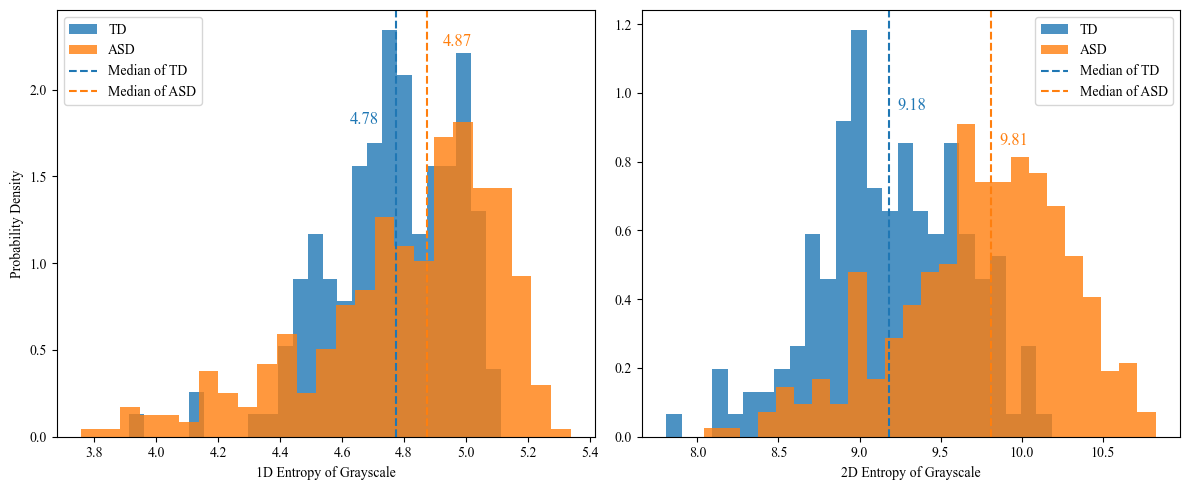

In [6]:
fig = plt.figure(figsize=(12,5))

plt.subplot(121)
plt.hist(entropy_grey[1], bins=25, density=True, alpha = 0.8, label='TD')
plt.hist(entropy_grey[0], bins=25, density=True, alpha = 0.8, label='ASD')

plt.axvline(np.median(entropy_grey[1]), linestyle='--', c='#1f77b4', label='Median of TD')
plt.text(np.median(entropy_grey[1])-0.15, 1.8, np.round(np.median(entropy_grey[1]),2), c='#1f77b4',fontsize=12)
plt.axvline(np.median(entropy_grey[0]), linestyle='--', c='#ff7f0e', label='Median of ASD')
plt.text(np.median(entropy_grey[0])+0.05, 2.25, np.round(np.median(entropy_grey[0]),2), c='#ff7f0e',fontsize=12)

plt.ylabel('Probability Density')
plt.xlabel('1D Entropy of Grayscale')
plt.legend()

plt.subplot(122)
plt.hist(entropy2d_grey[1], bins=25, density=True, alpha = 0.8, label='TD')
plt.hist(entropy2d_grey[0], bins=25, density=True, alpha = 0.8, label='ASD')

plt.axvline(np.median(entropy2d_grey[1]), linestyle='--', c='#1f77b4', label='Median of TD')
plt.text(np.median(entropy2d_grey[1])+0.05, 0.95, np.round(np.median(entropy2d_grey[1]),2), c='#1f77b4',fontsize=12)
plt.axvline(np.median(entropy2d_grey[0]), linestyle='--', c='#ff7f0e', label='Median of ASD')
plt.text(np.median(entropy2d_grey[0])+0.05, 0.85, np.round(np.median(entropy2d_grey[0]),2), c='#ff7f0e',fontsize=12)

plt.xlabel('2D Entropy of Grayscale')
plt.legend()

plt.tight_layout()
plt.show()
fig.savefig('entropy.svg')

In [10]:
draw_classes = ['ASD', 'TD']
draw_num = [379, 162]

In [7]:
def project_hue(im_HSV, im_gray):
    im_proj = np.zeros((im_HSV.shape[0],im_HSV.shape[1]),dtype=np.int16)
#     for i in range(im_HSV.shape[0]):
#         for j in range(im_HSV.shape[1]):
#             if im_HSV[i,j,2] < 20:
#                 im_proj[i,j] = -256
#             else:
#                 if im_HSV[i,j,1] < 15:
#                     im_proj[i,j] = -(255 - im_gray[i,j])
#                 else:
#                     im_proj[i,j] = im_HSV[i,j,0]
                    
    con1 = im_HSV[:,:,2] < 15
    con1r = ~con1
    con2 = im_HSV[:,:,1] < 10
    con2r = ~con2
    im_proj[con1] = -256
    im_proj[con1r & con2] = -(255 - im_gray[con1r & con2])
    im_proj[con1r & con2r] = im_HSV[:,:,0][con1r & con2r]
    return im_proj

In [ ]:
def calcEntropy_hue(img):
    entropy = []

    hist = Counter(img.reshape(-1)).items()
    total_pixel = img.shape[0] * img.shape[1]

    for item in hist:
        probability = item[1] / total_pixel
        en = -1 * probability * np.log(probability)
        entropy.append(en)

    sum_en = np.sum(entropy)
    return sum_en

In [20]:
entropy_hue = [[],[]]

for i,cls in enumerate(draw_classes):
    print(cls)
    draw_dr = f'../paintings/experiment/{cls}/'
    for j in range(1,draw_num[i]+1):
        print(j)
        im = cv2.imread(f"{draw_dr}/{j}.jpg")
        im1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im3 = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
        
        im_proj = project_hue(im3, im1)
        ep = calcEntropy_hue(im_proj)
        entropy_hue[i].append(ep)

ASD
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [27]:
entropy_hue = np.array(entropy_hue, dtype=object)
np.save('./results/entropy_hue.npy', entropy_hue)

In [ ]:
entropy_hue = np.load('./results/entropy_hue.npy', allow_pickle=True)

In [21]:
print('Rank-Biserial Correlation')
print('Entropy:')
display(pg.mwu(entropy_hue[1], entropy_hue[0]))

Rank-Biserial Correlation
Entropy:


,U-val,alternative,p-val,RBC,CLES
MWU,37737.0,two-sided,0.000024,-0.229258,0.614629


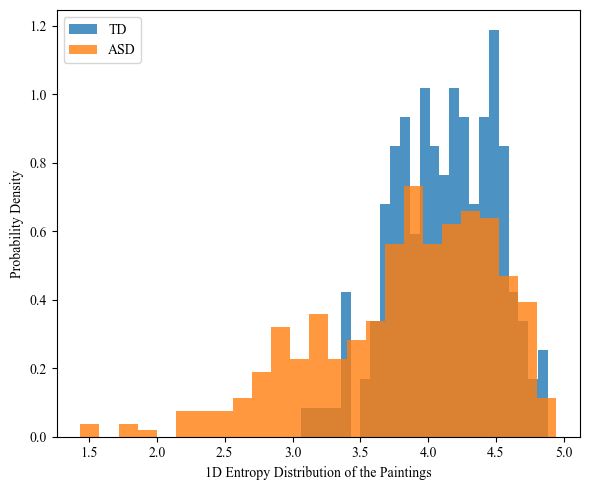

In [24]:
fig = plt.figure(figsize=(6,5))

plt.hist(entropy_hue[1], bins=25, density=True, alpha = 0.8, label='TD')
plt.hist(entropy_hue[0], bins=25, density=True, alpha = 0.8, label='ASD')

plt.ylabel('Probability Density')
plt.xlabel('1D Entropy Distribution of the Paintings')
plt.legend()

plt.tight_layout()
plt.show()